# Data

https://corgis-edu.github.io/corgis/csv/billionaires/

# Description

* 2614 rows, 22 columns
* Numerical & Categorical
* Missing Values included (Need Different Imputations)
* Can be used for EDA & Visualization 

# Project: BIG DATA ANALYTICS ASSESSMENT

Table of Contents:

. Introduction                                                                                                                                                                                                                   

. Data Wrangling & cleaning

. Exploratory Data Analysis

. Conclusions

# Introduction


### This data have been collected about the world's wealthiest individuals named the " billionaires.csv" dataset, containing several factors such as, AGE, GENDER, SECTOR, INHERITANCE, and many other factors.

### We are going to describe and analyse many of these factors that affects the billionaires wealth using Python tools to analyse and to answer the following researxh questions :

### . What are the top 10 countries with the highest number of billionaires?
### . What  industries or sectors are the most successful?
### . What are the main industries with the highest number of women billionaires?
### . What age range represents the highest and lowest number of billionaires?
### . What are the factors that might influence wealth, e.g. inheritance?

In [153]:
# Importing all libraries that we could use on the project

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

In [154]:
# Read the Data File & show the head of the DataFrame
df = pd.read_csv("C:/Users/moham/Desktop/Big Data Analytics/billionaires.csv")

In [155]:
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


# Data Wrangling & Cleaning




In [156]:
# Fix the Columns name to make it in lower letters and unified

df.columns = df.columns.str.replace(".", "_", regex=True).str.replace(" ", "_", regex=True).str.lower()
df.columns

Index(['name', 'rank', 'year', 'company_founded', 'company_name',
       'company_relationship', 'company_sector', 'company_type',
       'demographics_age', 'demographics_gender', 'location_citizenship',
       'location_country_code', 'location_gdp', 'location_region',
       'wealth_type', 'wealth_worth_in_billions', 'wealth_how_category',
       'wealth_how_from_emerging', 'wealth_how_industry',
       'wealth_how_inherited', 'wealth_how_was_founder',
       'wealth_how_was_political'],
      dtype='object')

In [157]:
# Exploring the Data
df.shape

(2614, 22)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company_founded           2614 non-null   int64  
 4   company_name              2576 non-null   object 
 5   company_relationship      2568 non-null   object 
 6   company_sector            2591 non-null   object 
 7   company_type              2578 non-null   object 
 8   demographics_age          2614 non-null   int64  
 9   demographics_gender       2580 non-null   object 
 10  location_citizenship      2614 non-null   object 
 11  location_country_code     2614 non-null   object 
 12  location_gdp              2614 non-null   float64
 13  location_region           2614 non-null   object 
 14  wealth_t

In [159]:
df.isnull().sum()

name                         0
rank                         0
year                         0
company_founded              0
company_name                38
company_relationship        46
company_sector              23
company_type                36
demographics_age             0
demographics_gender         34
location_citizenship         0
location_country_code        0
location_gdp                 0
location_region              0
wealth_type                 22
wealth_worth_in_billions     0
wealth_how_category          1
wealth_how_from_emerging     0
wealth_how_industry          1
wealth_how_inherited         0
wealth_how_was_founder       0
wealth_how_was_political     0
dtype: int64

In [228]:
# Dropping the Null Values (Missing Values are few )
df = df.dropna()

In [161]:
df.isnull().sum()

name                         0
rank                         0
year                         0
company_founded              0
company_name                38
company_relationship        46
company_sector              23
company_type                36
demographics_age             0
demographics_gender         34
location_citizenship         0
location_country_code        0
location_gdp                 0
location_region              0
wealth_type                 22
wealth_worth_in_billions     0
wealth_how_category          1
wealth_how_from_emerging     0
wealth_how_industry          1
wealth_how_inherited         0
wealth_how_was_founder       0
wealth_how_was_political     0
dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company_founded           2614 non-null   int64  
 4   company_name              2576 non-null   object 
 5   company_relationship      2568 non-null   object 
 6   company_sector            2591 non-null   object 
 7   company_type              2578 non-null   object 
 8   demographics_age          2614 non-null   int64  
 9   demographics_gender       2580 non-null   object 
 10  location_citizenship      2614 non-null   object 
 11  location_country_code     2614 non-null   object 
 12  location_gdp              2614 non-null   float64
 13  location_region           2614 non-null   object 
 14  wealth_t

In [163]:
# Checking for Duplicates

sum(df.duplicated())

0

In [164]:
# Rename the Columns

df.rename(columns={
        'demographics_age': 'age', 
        'location_citizenship': 'citizenship', 
        'demographics_gender': 'gender', 
        'location_country_code': 'country',
        'location_region': 'region',
        'wealth_worth_in_billions': 'net_worth',
        'wealth_how_category': 'w_category',
        'wealth_how_from_emerging': 'w_emerging',
        'wealth_how_industry': 'industry',
        'wealth_how_inherited': 'inheritance',
        'wealth_how_was_founder': 'w_founder',
        'wealth_how_was_political': 'w_political',
        'company_founded': 'c_founded',
        'company_name': 'c_name',
        'company_relationship': 'c_relationship',
        'company_type': 'c_type',
        'company_sector': 'c_sector'
    }, inplace=True)


In [165]:
df.head()

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,...,location_gdp,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [166]:
### Exploring the Columns :


In [167]:
# Location GDP Column :
# Transfering the values into integer to be more clear to understand :

df['location_gdp']= df['location_gdp'].astype('int64')
df['location_gdp'].dtype

dtype('int64')

In [168]:
# Find out a lot of "0" values:
# Calculating sum of zero values in location gdp column :

rows_with_zero_values = df['location_gdp'].eq(0).sum()

print(f"The sum of rows with 0 value in column 'location_gdp' is: {rows_with_zero_values}")


The sum of rows with 0 value in column 'location_gdp' is: 1665


In [169]:
# As we are going to use the region and citizenship column in our analysis,so I am going to drop the location GDP column :

df.drop('location_gdp', axis=1, inplace=True)


In [170]:
df.head()

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,...,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,USA,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,USA,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,USA,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,USA,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,USA,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [171]:
# Name Column :
# It is clear from the head of the Dataframe that their is duplicates in the name column in which same name has multiple rows :

bill_gates_count=df['name'].value_counts()['Bill Gates']
print(f"{'Bill Gates'} appears {bill_gates_count} times in the 'name' column.")

Bill Gates appears 3 times in the 'name' column.


In [172]:
name_to_find = 'Bill Gates'
bill_gates_df = df[df['name'] == name_to_find].head()
bill_gates_df

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,...,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,USA,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,USA,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,USA,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True


In [173]:
## This result will let me go to the Year Column to fix this dupicated Rows and take the last year for each name 

In [174]:
# Year Column :
df['year'].nunique()

3

In [175]:
df['year'].unique()

array([1996, 2001, 2014], dtype=int64)

In [176]:
year_counts = df['year'].value_counts()
year_counts

2014    1653
2001     538
1996     423
Name: year, dtype: int64

In [177]:
year_counts = df['year'].value_counts()
sum_of_values = year_counts.sum()
print(sum_of_values)

2614


In [178]:
# Indexing each name with his last year information gathered :

df_last_year = df.groupby('name')['year'].last().reset_index()
df_last_year.head(10)

,name,year
0,A Jerrold Perenchio,2001
1,A. Jerrold Perenchio,2014
2,Abdul Al Rahman Al Jeraisy,2001
3,Abdul Aziz Al Ghurair,2001
4,Abdul Aziz Al-Sulaiman,1996
5,Abdulla Al Futtaim,2014
6,Abdulla bin Ahmad Al Ghurair,2014
7,Abdullah Al Rajhi,2014
8,Abdulsamad Rabiu,2014
9,Abigail Johnson,1996


In [179]:
name_to_find_2 = 'Bill Gates'
bill_gates_df_2 = df[df['name'] == name_to_find].head()
bill_gates_df_2

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,...,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,USA,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,USA,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,USA,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True


In [180]:
#last_year_index = df.groupby('name')['year'].transform(max) == df['year']
#df_2 = df[last_year_index]

In [181]:
#df_2.head()

In [182]:
# Replace dots, commas, and multiple spaces with a single space in the 'name' column
df['name'] = df['name'].str.replace('[.,\s]+', ' ', regex=True)

# Sort by year and drop all duplicates except for the last one
df = df.sort_values('year').drop_duplicates('name', keep='last')


In [183]:
df.head()

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,...,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
432,Banyong Lamsam,143,1996,1945,Kasikornbank,relation,banking,new,0,male,...,THA,East Asia,inherited,2.5,Financial,True,Money Management,not inherited,True,True
1002,Frances Koshland Geballe,332,1996,1853,Levi Strauss & co,relation,jeans,new,0,female,...,USA,North America,inherited,1.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
442,Hisakazu Yamaguchi,147,1996,1950,Daiwan Can,relation,cans,new,0,male,...,JPN,East Asia,inherited,2.4,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
999,Masakazu Shiiki,329,1996,1946,Sanyo Shinpan,founder,finace,new,0,male,...,JPN,East Asia,self-made finance,1.2,Financial,True,Money Management,not inherited,True,True
986,Conle famle,328,1996,0,Sirosa,NaN,real estate,NaN,0,NaN,...,DEU,Europe,NaN,1.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True


In [184]:
# Check the result:

check_bill_gates_count=df['name'].value_counts()['Bill Gates']
print(f"{'Bill Gates'} appears {check_bill_gates_count} times in the 'name' column.")
print('-' * 40)
print('-' * 40)
print(bill_gates_df_2)
print('-' * 40)
print('-' * 40)

check_df_last_year = df.groupby('name')['year'].last().reset_index()
print(check_df_last_year)

Bill Gates appears 1 times in the 'name' column.
----------------------------------------
----------------------------------------
         name  rank  year  c_founded     c_name c_relationship   c_sector  \
0  Bill Gates     1  1996       1975  Microsoft        founder   Software   
1  Bill Gates     1  2001       1975  Microsoft        founder   Software   
2  Bill Gates     1  2014       1975  Microsoft        founder   Software   

  c_type  age gender  ... country         region          wealth_type  \
0    new   40   male  ...     USA  North America  founder non-finance   
1    new   45   male  ...     USA  North America  founder non-finance   
2    new   58   male  ...     USA  North America  founder non-finance   

  net_worth   w_category w_emerging             industry    inheritance  \
0      18.5  New Sectors       True  Technology-Computer  not inherited   
1      58.7  New Sectors       True  Technology-Computer  not inherited   
2      76.0  New Sectors       True  Techn

In [185]:
# Age Column:
# Observe that the age column has zero values 

age_row_with_zero_values = df['age'].eq(0).sum()

print(f"The sum of rows with 0 value in column 'age' is: {age_row_with_zero_values}")


The sum of rows with 0 value in column 'age' is: 306


In [186]:
# Replace the zero values with the median:

# Calculate the median of age
median_age = df['age'].median()

# Replace 0 values with the mean age
df.loc[df['age'] == 0, 'age'] = median_age

# Print the resulting DataFrame
print(f"The median age is: {median_age}")


The median age is: 60.0


In [187]:
# Check the age column result:

check_age_row_with_zero_values = df['age'].eq(0).sum()

print(f"The sum of rows with 0 value in column 'age' is: {check_age_row_with_zero_values}")


The sum of rows with 0 value in column 'age' is: 0


In [188]:
#Explore the Citizenship & Country columns

new_table = df[['citizenship', 'country']]
new_table.head(10)

,citizenship,country
432,Thailand,THA
1002,United States,USA
442,Japan,JPN
999,Japan,JPN
986,Germany,DEU
1003,United States,USA
985,Germany,DEU
1036,United States,USA
1035,United States,USA
404,Japan,JPN


In [36]:
df['citizenship'].nunique()

73

In [189]:
df['country'].nunique()

74

In [190]:
df['citizenship'].unique()

array(['Thailand', 'United States', 'Japan', 'Germany', 'Mexico',
       'Saudi Arabia', 'South Korea', 'Indonesia', 'Hong Kong', 'Chile',
       'Ecuador', 'Canada', 'Brazil', 'Greece', 'Switzerland', 'Malaysia',
       'Argentina', 'Taiwan', 'France', 'Liechtenstein', 'Italy',
       'Lebanon', 'South Africa', 'United Kingdom', 'Colombia',
       'Philippines', 'Israel', 'Bahrain', 'Netherlands', 'Spain',
       'Sweden', 'Russia', 'New Zealand', 'Singapore',
       'United Arab Emirates', 'China', 'Australia', 'Ireland', 'Turkey',
       'India', 'Kuwait', 'Denmark', 'Bermuda', 'Portugal', 'Norway',
       'Peru', 'Czech Republic', 'Vietnam', 'Ukraine', 'Venezuela',
       'Monaco', 'Lithuania', 'Tanzania', 'Kazakhstan', 'Macau', 'Cyprus',
       'Egypt', 'Morocco', 'Austria', 'Belgium', 'Nepal', 'Finland',
       'Oman', 'St. Kitts and Nevis', 'Romania', 'Nigeria', 'Poland',
       'Uganda', 'Georgia', 'Angola', 'Guernsey', 'Algeria', 'Swaziland'],
      dtype=object)

In [191]:
df['country'].unique()

array(['THA', 'USA', 'JPN', 'DEU', 'MEX', 'SAU', 'KOR', 'IDN', 'HKG',
       'CHL', 'ECU', 'CAN', 'BRA', 'GRC', 'CHE', 'MYS', 'ARG', 'Taiwan',
       'FRA', 'LIE', 'ITA', 'LBN', 'ZAF', 'GBR', 'COL', 'PHL', 'ISR',
       'BHR', 'NLD', 'ESP', 'SWE', 'RUS', 'NZL', 'SGP', 'ARE', 'CHN',
       'AUS', 'IRL', 'TUR', 'IND', 'KWT', 'DNK', 'BMU', 'PRT', 'NOR',
       'PER', 'CZE', 'VNM', 'UKR', 'VEN', 'MCO', 'LTU', 'TZA', 'KAZ',
       'MAC', 'CYP', 'EGY', 'MAR', 'AUT', 'BEL', 'NPL', 'FIN', 'OMN',
       'KNA', 'ROU', 'NGA', 'POL', 'DEN', 'UGA', 'GEO', 'AGO', 'GGY',
       'DZA', 'SWZ'], dtype=object)

In [192]:
# Filter rows with 'DEN' in the 'citizenship' column
den_rows = df.loc[df['citizenship'] == 'Denmark', ['citizenship', 'country']]

# Display the selected columns for the filtered rows
print(den_rows)


     citizenship country
635      Denmark     DNK
2541     Denmark     DEN
803      Denmark     DEN
1141     Denmark     DEN
360      Denmark     DEN
1604     Denmark     DEN
1248     Denmark     DEN


In [193]:
dnk=df.loc[635, 'country']
#dnk="DNK"

print(f" Row 635 has different code for Denmark in column 'country', but has not significant effect as I'm going to use the citizenship column instead to show the country: {dnk}")


 Row 635 has different code for Denmark in column 'country', but has not significant effect as I'm going to use the citizenship column instead to show the country: DNK


In [194]:
# Drop the Country Column :
df = df.drop('country', axis=1)


In [195]:
# Rename the Citizenship Column as Country :
df.rename(columns={'citizenship':'country'}, inplace=True)


In [196]:
df.head()

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
432,Banyong Lamsam,143,1996,1945,Kasikornbank,relation,banking,new,60,male,Thailand,East Asia,inherited,2.5,Financial,True,Money Management,not inherited,True,True
1002,Frances Koshland Geballe,332,1996,1853,Levi Strauss & co,relation,jeans,new,60,female,United States,North America,inherited,1.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
442,Hisakazu Yamaguchi,147,1996,1950,Daiwan Can,relation,cans,new,60,male,Japan,East Asia,inherited,2.4,Non-Traded Sectors,True,"Retail, Restaurant",father,True,True
999,Masakazu Shiiki,329,1996,1946,Sanyo Shinpan,founder,finace,new,60,male,Japan,East Asia,self-made finance,1.2,Financial,True,Money Management,not inherited,True,True
986,Conle famle,328,1996,0,Sirosa,NaN,real estate,NaN,60,NaN,Germany,Europe,NaN,1.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True


In [45]:
# Explore the Region Column :

df['region'].value_counts()

North America               723
Europe                      542
East Asia                   424
Latin America               137
Middle East/North Africa     96
South Asia                   63
Sub-Saharan Africa           17
0                             1
Name: region, dtype: int64

In [46]:
# Drop the rows with '0' in the "region" column

df = df[df['region'] != '0']
df['region'].value_counts()

North America               723
Europe                      542
East Asia                   424
Latin America               137
Middle East/North Africa     96
South Asia                   63
Sub-Saharan Africa           17
Name: region, dtype: int64

In [47]:
# Explore the Industry Column :

df['industry'].unique()

array(['Constrution', 'Real Estate', 'Diversified financial', 'Consumer',
       'Money Management', 'Retail, Restaurant', 'Media',
       'Mining and metals', 'Hedge funds', 'Technology-Computer',
       'Energy', 'Non-consumer industrial', '0', 'Other', 'services',
       'Technology-Medical', 'Private equity/leveraged buyout',
       'Venture Capital'], dtype=object)

In [48]:
# # Observe that the Industry column has zero values 

industry_rows_with_zero_values =sum( df['industry'] == '0')
print(f"The sum of rows with 0 value in column 'industry' is: {industry_rows_with_zero_values}")


The sum of rows with 0 value in column 'industry' is: 9


In [197]:
# Check the columns with zero values :
industry_rows_with_zero_values = '0'
filtered_df_industry = df[df['industry'] == industry_rows_with_zero_values]
filtered_df_industry.head()

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
985,Reimann family,327,1996,1923,Benckiser,NaN,consumer goods,aquired,60,NaN,Germany,Europe,inherited,1.2,0,True,0,not inherited,True,True
1148,Carl Lindner Jr,379,1996,1959,American Financial Group,founder,banking,new,76,male,United States,North America,founder non-finance,1.1,0,True,0,not inherited,True,True
384,Porsche family,128,1996,1931,Porsche,NaN,cars,new,60,NaN,Germany,Europe,inherited,2.5,0,True,0,father,True,True
714,Robert Naify,234,2001,1912,NaN,relation,movie theatres,new,79,male,United States,North America,inherited,2.0,0,True,0,father,True,True
955,Robert Johnson,312,2001,1980,Black Entertainment Television,founder,media,new,54,male,United States,North America,founder non-finance,1.6,0,True,0,not inherited,True,True


In [50]:
# Drop the rows with zero values on the industry column so it won't affect our coming analysis :

df = df[df['industry'] != '0']


In [51]:
# Check the Industry Column result:


check_industry_rows_with_zero_values =sum( df['industry'] == '0')
print(f"The sum of rows with 0 value in column 'industry' is: {check_industry_rows_with_zero_values}")

The sum of rows with 0 value in column 'industry' is: 0


In [52]:
# Explore the Company Sector Column :

sector_rows_with_zero_values =sum( df['c_sector'] == '0')
print(f"The sum of rows with 0 value in column 'c_sector' is: {sector_rows_with_zero_values}")

The sum of rows with 0 value in column 'c_sector' is: 0


In [53]:
#Find out some extra spaces in the values of the column such as (technology) taht may affect our analysis :

# (technology) had two values with 23 & 5 count with a difference of extra space :

# check and remove any extra space in the column :

# remove leading and trailing whitespace from the 'c_sector' column
df['c_sector'] = df['c_sector'].str.strip()
sector_count = df['c_sector'].value_counts()
sector_count.head(15)

real estate        135
retail              92
construction        81
media               76
banking             71
pharmaceuticals     61
oil                 53
hedge funds         45
software            44
technology          28
private equity      25
groceries           25
mining              23
electronics         23
shipping            22
Name: c_sector, dtype: int64

In [54]:
# extract all rows where 'c_sector' is 'technology'
tech_df = df[df['c_sector'] == 'technology']

# sort the resulting DataFrame by a column of your choice, e.g. 'net_worth'
sorted_tech_df = tech_df.sort_values('net_worth', ascending=False)

# print the sorted DataFrame
sorted_tech_df

,name,rank,year,c_founded,c_name,c_relationship,c_sector,c_type,age,gender,country,region,wealth_type,net_worth,w_category,w_emerging,industry,inheritance,w_founder,w_political
50,Larry Page,17,2014,1998,Google,founder,technology,new,40,male,United States,North America,founder non-finance,32.3,New Sectors,True,Technology-Computer,not inherited,True,True
54,Jeff Bezos,18,2014,1995,Amazon,founder,technology,new,50,male,United States,North America,founder non-finance,32.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
56,Sergey Brin,19,2014,1998,Google,founder,technology,new,40,male,United States,North America,founder non-finance,31.8,New Sectors,True,Technology-Computer,not inherited,True,True
63,Mark Zuckerberg,21,2014,2004,Facebook,founder,technology,new,29,male,United States,North America,founder non-finance,28.5,New Sectors,True,Technology-Computer,not inherited,True,True
107,Steve Ballmer,36,2014,1975,Microsoft,CEO,technology,new,57,male,United States,North America,executive,19.3,New Sectors,True,Technology-Computer,not inherited,True,True
125,Masayoshi Son,42,2014,1981,Softbank,founder/CEO,technology,new,56,male,Japan,East Asia,founder non-finance,18.4,New Sectors,True,Technology-Computer,not inherited,True,True
143,Michael Dell,48,2014,1984,Dell,founder,technology,new,49,male,United States,North America,founder non-finance,17.5,New Sectors,True,Technology-Computer,not inherited,True,True
37,Steven Ballmer,13,2001,1975,Microsoft,CEO,technology,new,44,male,United States,North America,executive,16.6,New Sectors,True,Technology-Computer,not inherited,True,True
167,Paul Allen,56,2014,1975,Microsoft,founder,technology,new,61,male,United States,North America,founder non-finance,15.9,New Sectors,True,Technology-Computer,not inherited,True,True
219,Laurene Powell Jobs,73,2014,1976,Apple,relation,technology,new,50,female,United States,North America,inherited,14.0,New Sectors,True,Technology-Computer,spouse/widow,True,True


In [55]:
# Explore the Gender Column :

df['gender'].value_counts()

male              1785
female             206
married couple       2
Name: gender, dtype: int64

In [56]:
# Replace the married couple values with the mode :

mode_gender = df['gender'].mode()[0]  # get the mode value
df['gender'] = df['gender'].replace('married couple', mode_gender)  # replace the value with the mode


In [57]:
df['gender'].value_counts()

male      1787
female     206
Name: gender, dtype: int64

In [58]:
# Explore the Inheritance Column :

df['inheritance'].unique()

array(['not inherited', '3rd generation', '4th generation', 'father',
       'spouse/widow', '5th generation or longer'], dtype=object)

In [59]:
df['inheritance'].replace({'not inherited': 'Not Inherited', 
                              'father': 'Inherited', 
                              'spouse/widow': 'Inherited',
                              '3rd generation': 'Inherited',
                              '4th generation': 'Inherited',
                              '5th generation or longer': 'Inherited'}, inplace=True)


In [60]:
# Check the Inheritance Column result :

df['inheritance'].unique()

array(['Not Inherited', 'Inherited'], dtype=object)

In [61]:
# Check the Net Worth Column result :

df['net_worth'].dtype

dtype('float64')

In [62]:
# Convert the Net Worth values into Integer :

df['net_worth']= df['net_worth'].astype('int64')
df['net_worth'].dtype

dtype('int64')

In [63]:
# Create new Dataframe :

df_billionaires = df[['name', 'age', 'gender', 'country', 'region','net_worth','inheritance','industry','c_sector']]
df_billionaires = df_billionaires.sort_index()

df_billionaires.head(10)

,name,age,gender,country,region,net_worth,inheritance,industry,c_sector
2,Bill Gates,58,male,United States,North America,76,Not Inherited,Technology-Computer,Software
5,Carlos Slim Helu,74,male,Mexico,Latin America,72,Not Inherited,Media,Communications
8,Amancio Ortega,77,male,Spain,Europe,64,Not Inherited,"Retail, Restaurant",Fashion
11,Warren Buffett,83,male,United States,North America,58,Not Inherited,Consumer,Finance
13,Theo and Karl Albrecht,61,male,Germany,Europe,25,Not Inherited,"Retail, Restaurant",groceries
14,Larry Ellison,69,male,United States,North America,48,Not Inherited,Technology-Computer,software
17,Charles Koch,78,male,United States,North America,40,Inherited,Diversified financial,Oil refining
18,David Koch,73,male,United States,North America,40,Inherited,Diversified financial,Oil refining
22,John Walton,55,male,United States,North America,18,Inherited,Consumer,retail
23,Sheldon Adelson,80,male,United States,North America,38,Not Inherited,Real Estate,casinos


In [64]:
# checking the new DataFrame :

df_billionaires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 2 to 2613
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1993 non-null   object
 1   age          1993 non-null   int64 
 2   gender       1993 non-null   object
 3   country      1993 non-null   object
 4   region       1993 non-null   object
 5   net_worth    1993 non-null   int64 
 6   inheritance  1993 non-null   object
 7   industry     1993 non-null   object
 8   c_sector     1993 non-null   object
dtypes: int64(2), object(7)
memory usage: 155.7+ KB


In [65]:
# checking for missing values :

df_billionaires.isnull().sum()

name           0
age            0
gender         0
country        0
region         0
net_worth      0
inheritance    0
industry       0
c_sector       0
dtype: int64

In [66]:
# checking for zero values :

if (df_billionaires == 0).any().any():
    print("DataFrame contains at least one 0 value")
else:
    print("DataFrame does not contain any 0 values")

DataFrame does not contain any 0 values


In [67]:
# Number of Rows & Columns :

print(f"The dataframe has {df_billionaires.shape[0]} rows and {df_billionaires.shape[1]} columns.")


The dataframe has 1993 rows and 9 columns.


In [68]:
# Number of Billionaires :

num_billionaires = df_billionaires.shape[0]
print(f"There are {num_billionaires} billionaires in the dataframe.")

There are 1993 billionaires in the dataframe.


In [69]:
# Number of Regions :

num_regions = df_billionaires['region'].nunique()
print(f"There are {num_regions} regions in the dataset.")

There are 7 regions in the dataset.


In [70]:
# Number of Countries :

num_countries = df_billionaires['country'].nunique()
print(f"There are {num_countries} countries in the dataset.")

There are 72 countries in the dataset.


In [71]:
# Number of Industries :

num_industries = df_billionaires['industry'].nunique()
print(f"There are {num_industries} industries in the dataset.")

There are 17 industries in the dataset.


In [72]:
# Number of Sectors :

num_sectors = df_billionaires['c_sector'].nunique()
print(f"There are {num_sectors} sectors in the dataset.")

There are 494 sectors in the dataset.


In [73]:
# Average of Billionaires age :

mean_age  = df_billionaires['age'].mean()
print(f"Average Billionaires age is: {mean_age}")

Average Billionaires age is: 63.32062217762168


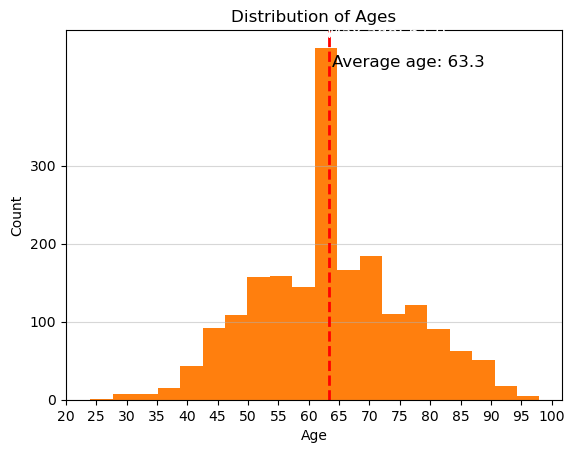

In [74]:
# create histogram
plt.hist(df['age'], bins=20, color='orange')

# calculate mean of age column
mean_age = df['age'].mean()

# add vertical line at the mean with mean value as text
plt.axvline(x=mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age+0.5, plt.ylim()[1]*0.9, f'Average age: {mean_age:.1f}', color='black', fontsize=12)

# get x and y coordinates of maximum bin
ymax = plt.ylim()[1]
xmax = plt.hist(df['age'], bins=20)[1][plt.hist(df['age'], bins=20)[0].argmax()]

# add text annotation at maximum bin
plt.annotate(f'Max age: {xmax:.1f}', xy=(xmax, ymax), xytext=(xmax+2, ymax-10), color='white',
             fontsize=12)#, arrowstyle='->',, arrowprops=dict(facecolor='white', arrowstyle='->')

# set plot properties
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(20, 101, 5))
plt.yticks(range(0, 400, 100))
plt.grid(axis='y', alpha=0.5)
plt.show()


## From the previous Data Cleaning & Wrangling :
#### ----------------------------------------------------------------------------------------------

### .We can conclude that the dataset is now more organized and ready for further analysis. 
### .We have handled missing values, duplicates, and corrected data types to ensure the accuracy of the data.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------------------
## And from all the above we found:
#### -------------------------------------------------------------------
### - No duplicate rows

### - No Missing values

### - New DataFrame does not contain any 0 values

### - New DataFrame has 1993 Rows and 8 Columns.

### - There are 7 Regions in the Dataset.

### - There are 72 Countries in the Dataset.

### - There are 17 Industries in the Dataset.

### - There are 509 Sectors in the Dataset.

### - Average Billionaires age is: 63.3




# Exploratory Data Analysis

In [198]:
df_billionaires.head()

,name,age,gender,country,region,net_worth,inheritance,industry,c_sector
2,Bill Gates,58,male,United States,North America,76,Not Inherited,Technology-Computer,Software
5,Carlos Slim Helu,74,male,Mexico,Latin America,72,Not Inherited,Media,Communications
8,Amancio Ortega,77,male,Spain,Europe,64,Not Inherited,"Retail, Restaurant",Fashion
11,Warren Buffett,83,male,United States,North America,58,Not Inherited,Consumer,Finance
13,Theo and Karl Albrecht,61,male,Germany,Europe,25,Not Inherited,"Retail, Restaurant",groceries


In [76]:
df_billionaires.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1993.0,63.320622,12.256670,24.0,55.0,61.0,72.0,98.0
net_worth,1993.0,3.280983,5.382304,1.0,1.0,2.0,3.0,76.0


## 1) What are the top 10 Countries with the highest number of Billionaires ?


In [77]:
countries_top_10 = df_billionaires['country'].value_counts().nlargest(10)
countries_top_10

United States     641
China             149
Russia            112
Germany           104
Brazil             71
Hong Kong          58
India              57
Japan              54
France             53
United Kingdom     52
Name: country, dtype: int64

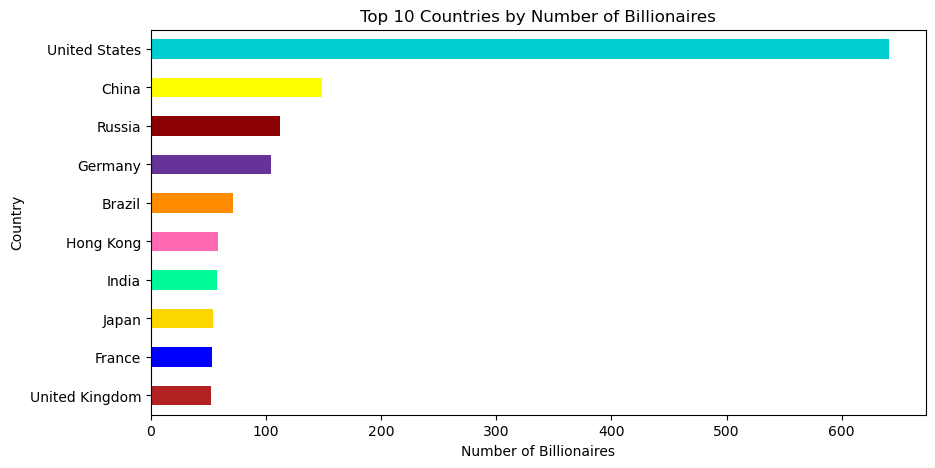

In [78]:
colors = ['firebrick', 'blue', 'gold', 'mediumspringgreen', 'hotpink', 'darkorange',
          'rebeccapurple', 'darkred', 'yellow', 'darkturquoise']


# Create a horizontal bar chart
countries_top_10.sort_values(ascending=True).plot(kind='barh',color=colors,figsize=(10,5))

# Set the chart title and axis labels
plt.title('Top 10 Countries by Number of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')

# Display the chart
plt.show()

##  2) What industries or sectors are the most successful ?

### Industry

In [79]:
industry_billionaires_count = df_billionaires['industry'].value_counts()

data_industry = {'industry': industry_billionaires_count.index,
        'Number_of_Billionaires': industry_billionaires_count.values}
data_industry=pd.DataFrame(data_industry)
top_10_industries=data_industry
top_10_industries

,industry,Number_of_Billionaires
0,Consumer,356
1,Real Estate,213
2,"Retail, Restaurant",211
3,Money Management,175
4,Technology-Computer,156
5,Diversified financial,150
6,Media,150
7,Energy,105
8,Non-consumer industrial,91
9,Technology-Medical,88


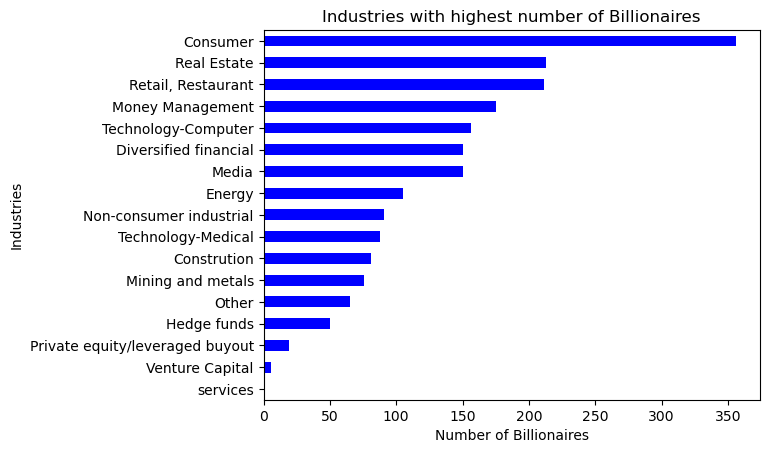

In [80]:
# Create a horizontal bar chart
top_10_industries.sort_values('Number_of_Billionaires').set_index('industry')['Number_of_Billionaires'].plot(kind='barh', color='blue')

# Set the chart title and axis labels
plt.title('Industries with highest number of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industries')

# Display the chart
plt.show()


In [81]:
# Grouping the data by industry and calculate the total net worth for each group
industry_net_worth = df_billionaires.groupby('industry')['net_worth'].sum()

# Sort the result in descending order
industry_net_worth = industry_net_worth.sort_values(ascending=False)

# Print the result
industry_net_worth


industry
Consumer                           1239
Retail, Restaurant                  843
Technology-Computer                 685
Diversified financial               597
Real Estate                         565
Media                               561
Money Management                    432
Energy                              335
Non-consumer industrial             267
Mining and metals                   225
Technology-Medical                  205
Constrution                         179
Other                               167
Hedge funds                         162
Private equity/leveraged buyout      67
Venture Capital                       9
services                              1
Name: net_worth, dtype: int64

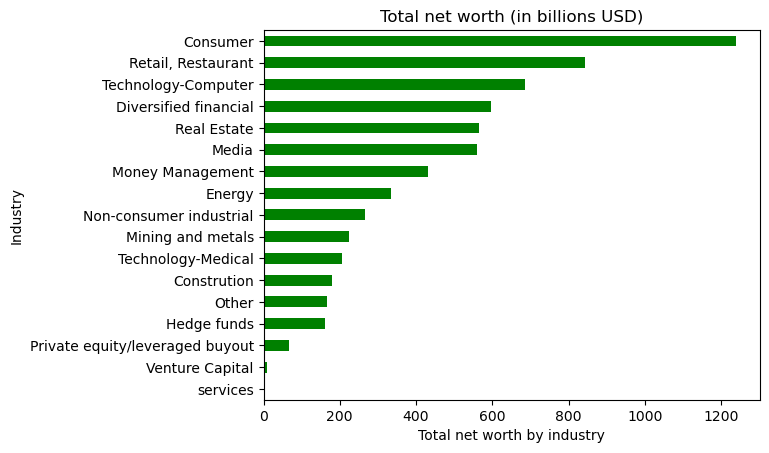

In [82]:
# Create a horizontal bar chart
industry_net_worth.sort_values(ascending=True).plot(kind='barh', color='green')

# Set the chart title and axis labels
plt.title('Total net worth (in billions USD)')
plt.xlabel('Total net worth by industry')
plt.ylabel('Industry')

# Display the chart
plt.show()

In [83]:
# group the data by industry and get the count and sum of net worth
industry_group = df_billionaires.groupby('industry')
industry_count = industry_group['name'].count()
industry_net_worth_sum = industry_group['net_worth'].sum()



# create a new DataFrame with the required columns
industry_data = pd.DataFrame({ 'total_net_worth': industry_net_worth_sum,'number_of_billionaires': industry_count})


# sort the DataFrame by the total net-worth in descending order
industry_data = industry_data.sort_values(by='total_net_worth', ascending=False)

# print the result
industry_data


,total_net_worth,number_of_billionaires
industry,,
Consumer,1239,356
"Retail, Restaurant",843,211
Technology-Computer,685,156
Diversified financial,597,150
Real Estate,565,213
Media,561,150
Money Management,432,175
Energy,335,105
Non-consumer industrial,267,91


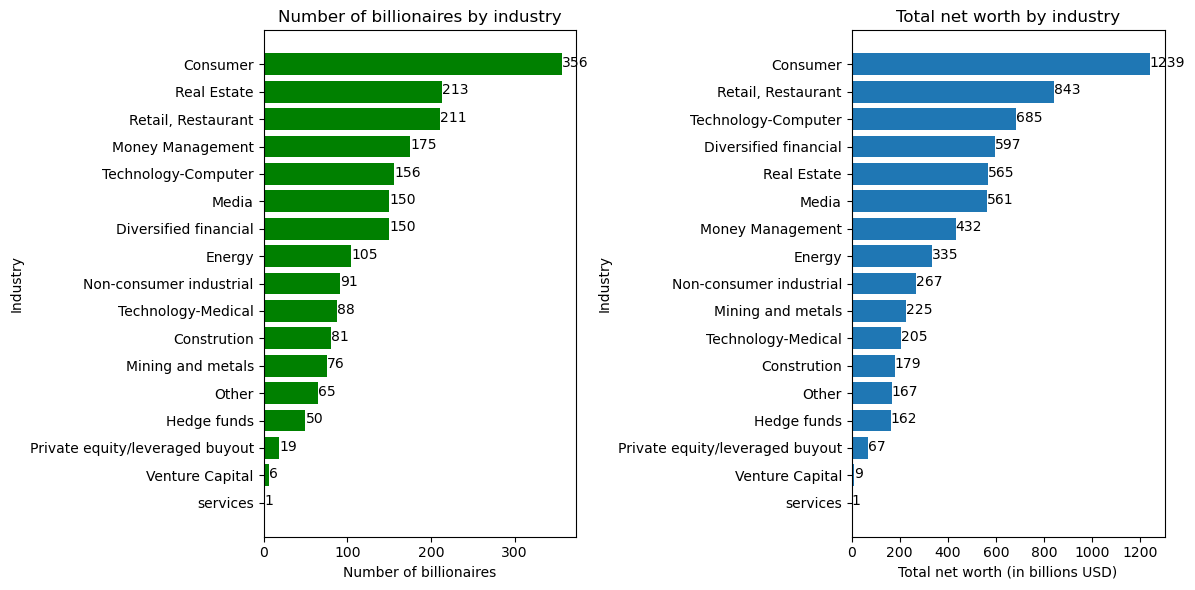

In [87]:
# sort the DataFrame by the total net-worth in descending order
industry_count = industry_count.sort_values(ascending=True)
industry_net_worth_sum = industry_net_worth_sum.sort_values(ascending=True)

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# create a horizontal bar chart for the number of billionaires
axs[0].barh(industry_count.index, industry_count.values, color='green')
axs[0].set_xlabel('Number of billionaires')
axs[0].set_ylabel('Industry')
axs[0].set_title('Number of billionaires by industry')
# Add the value labels to each bar
for i, v in enumerate(industry_count.sort_values(ascending=True)):
    axs[0].text(v + 0.1, i - 0.1, str(v) )


# create a horizontal bar chart for the total net worth
axs[1].barh(industry_net_worth_sum.index, industry_net_worth_sum.values)
axs[1].set_xlabel('Total net worth (in billions USD)')
axs[1].set_ylabel('Industry')
axs[1].set_title('Total net worth by industry')

# Add the value labels to each bar
for i, v in enumerate(industry_net_worth_sum.sort_values(ascending=True)):
    axs[1].text(v + 0.1, i - 0.1, str(v) )

# adjust the layout and display the plot
fig.tight_layout()
plt.show()




###  if you are trying to understand the concentration of wealth in different industries, you may want to analyze the total net worth of all billionaires in each industry. On the other hand, if you are interested in identifying industries with the most opportunities for wealth creation, you may want to analyze the count of billionaires for each industry.
### However, if you want to analyze the best industries to invest in as a billionaire, you have to get the industries average net worth per billionaire.

In [84]:
# calculate the percentage of billionaires, net worth for each industry to get the percentage of net worth per billionaire
industry_data['percentage_of_billionaires'] = round(industry_data['number_of_billionaires'] / industry_data['number_of_billionaires'].sum() * 100, 2).apply(lambda x: str(x) + '%')
industry_data['percentage_of_net_worth'] = round(industry_data['total_net_worth'] / industry_data['total_net_worth'].sum() * 100, 2).apply(lambda x: str(x) + '%')
industry_data['percentage_net_worth_per_bill']= round(industry_data['total_net_worth'] / industry_data['number_of_billionaires'] , 2).apply(lambda x: str(x) + '%')

In [85]:
industry_data_2=industry_data[['total_net_worth','percentage_of_net_worth','number_of_billionaires','percentage_of_billionaires','percentage_net_worth_per_bill']]


In [86]:
industry_data_2

,total_net_worth,percentage_of_net_worth,number_of_billionaires,percentage_of_billionaires,percentage_net_worth_per_bill
industry,,,,,
Consumer,1239,18.95%,356,17.86%,3.48%
"Retail, Restaurant",843,12.89%,211,10.59%,4.0%
Technology-Computer,685,10.48%,156,7.83%,4.39%
Diversified financial,597,9.13%,150,7.53%,3.98%
Real Estate,565,8.64%,213,10.69%,2.65%
Media,561,8.58%,150,7.53%,3.74%
Money Management,432,6.61%,175,8.78%,2.47%
Energy,335,5.12%,105,5.27%,3.19%
Non-consumer industrial,267,4.08%,91,4.57%,2.93%


In [88]:
industry_data['percentage_net_worth_per_bill'].sort_values(ascending= False)

industry
Technology-Computer                4.39%
Retail, Restaurant                  4.0%
Diversified financial              3.98%
Media                              3.74%
Private equity/leveraged buyout    3.53%
Consumer                           3.48%
Hedge funds                        3.24%
Energy                             3.19%
Mining and metals                  2.96%
Non-consumer industrial            2.93%
Real Estate                        2.65%
Other                              2.57%
Money Management                   2.47%
Technology-Medical                 2.33%
Constrution                        2.21%
Venture Capital                     1.5%
services                            1.0%
Name: percentage_net_worth_per_bill, dtype: object

In [89]:
# create a copy of the column
industry_percentages = industry_data['percentage_net_worth_per_bill'].copy()

# remove the '%' symbol and convert to float
industry_percentages = industry_percentages.str.replace('%', '').astype(float)

# print the converted values
industry_percentages.sort_values(ascending= False)

industry
Technology-Computer                4.39
Retail, Restaurant                 4.00
Diversified financial              3.98
Media                              3.74
Private equity/leveraged buyout    3.53
Consumer                           3.48
Hedge funds                        3.24
Energy                             3.19
Mining and metals                  2.96
Non-consumer industrial            2.93
Real Estate                        2.65
Other                              2.57
Money Management                   2.47
Technology-Medical                 2.33
Constrution                        2.21
Venture Capital                    1.50
services                           1.00
Name: percentage_net_worth_per_bill, dtype: float64

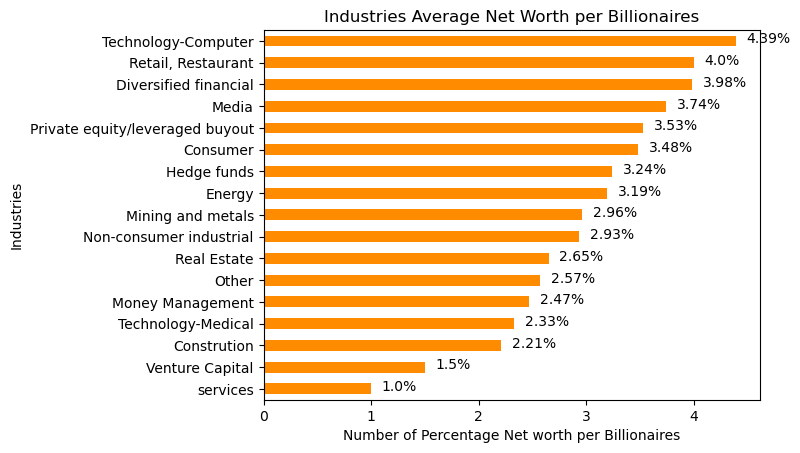

In [90]:
# Create a horizontal bar chart
ax = industry_percentages.sort_values(ascending=True).plot(kind='barh', color='darkorange')

# Set the chart title and axis labels
plt.title('Industries Average Net Worth per Billionaires')
plt.xlabel('Number of Percentage Net worth per Billionaires')
plt.ylabel('Industries')

# Add the value labels to each bar
for i, v in enumerate(industry_percentages.sort_values(ascending=True)):
    ax.text(v + 0.1, i - 0.1, str(v) + '%')

# Display the chart
plt.show()


### Sectors

### Number of sectors per industry :

In [202]:
billionaires_count = df_billionaires['industry'].value_counts()
billionaires_count

Consumer                           356
Real Estate                        213
Retail, Restaurant                 211
Money Management                   175
Technology-Computer                156
Diversified financial              150
Media                              150
Energy                             105
Non-consumer industrial             91
Technology-Medical                  88
Constrution                         81
Mining and metals                   76
Other                               65
Hedge funds                         50
Private equity/leveraged buyout     19
Venture Capital                      6
services                             1
Name: industry, dtype: int64

In [201]:
number_of_sectors=df_billionaires.groupby('industry')['c_sector'].nunique()
number_of_sectors

industry
Constrution                         14
Consumer                           138
Diversified financial               91
Energy                              43
Hedge funds                         10
Media                               41
Mining and metals                   38
Money Management                    58
Non-consumer industrial             45
Other                               45
Private equity/leveraged buyout      5
Real Estate                         42
Retail, Restaurant                  76
Technology-Computer                 49
Technology-Medical                  15
Venture Capital                      2
services                             1
Name: c_sector, dtype: int64

### Relation between Number of Sectors & Number of Billionaires :

In [91]:
billionaires_count = df_billionaires['industry'].value_counts()
number_of_sectors=df_billionaires.groupby('industry')['c_sector'].nunique()

In [92]:
data_sector_to_billionaires = {'industry': billionaires_count.index,
        'Number_of_Billionaires': billionaires_count.values}
data_sector_to_billionaires=pd.DataFrame(data_sector_to_billionaires)
data_sector_to_billionaires

,industry,Number_of_Billionaires
0,Consumer,356
1,Real Estate,213
2,"Retail, Restaurant",211
3,Money Management,175
4,Technology-Computer,156
5,Diversified financial,150
6,Media,150
7,Energy,105
8,Non-consumer industrial,91
9,Technology-Medical,88


In [93]:
data_sector_number = {'industry': number_of_sectors.index,
        'number_of_sectors': number_of_sectors.values}
data_sector_number=pd.DataFrame(data_sector_number)
data_sector_number

,industry,number_of_sectors
0,Constrution,14
1,Consumer,138
2,Diversified financial,91
3,Energy,43
4,Hedge funds,10
5,Media,41
6,Mining and metals,38
7,Money Management,58
8,Non-consumer industrial,45
9,Other,45


In [94]:
# merge the new dataframe with the original dataframe based on the common column 'industry'
data_sector_to_billionaires = pd.merge(data_sector_to_billionaires, data_sector_number, on='industry', how='left')

In [95]:
data_sector_to_billionaires

,industry,Number_of_Billionaires,number_of_sectors
0,Consumer,356,138
1,Real Estate,213,42
2,"Retail, Restaurant",211,76
3,Money Management,175,58
4,Technology-Computer,156,49
5,Diversified financial,150,91
6,Media,150,41
7,Energy,105,43
8,Non-consumer industrial,91,45
9,Technology-Medical,88,15


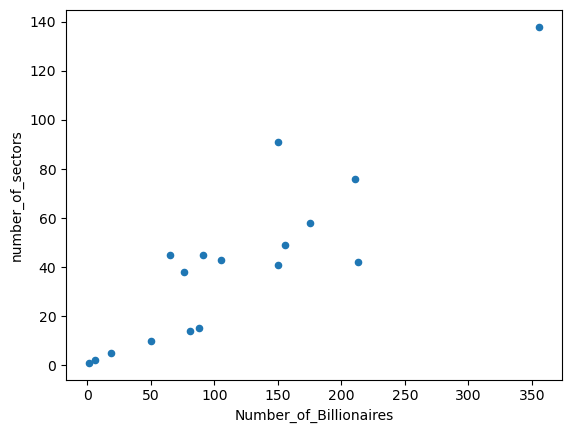

In [96]:
data_sector_to_billionaires.plot(x='Number_of_Billionaires', y='number_of_sectors', kind='scatter');

### Positive correlation as the sectors number increase in each industry,  the industry's number of billionaires increase

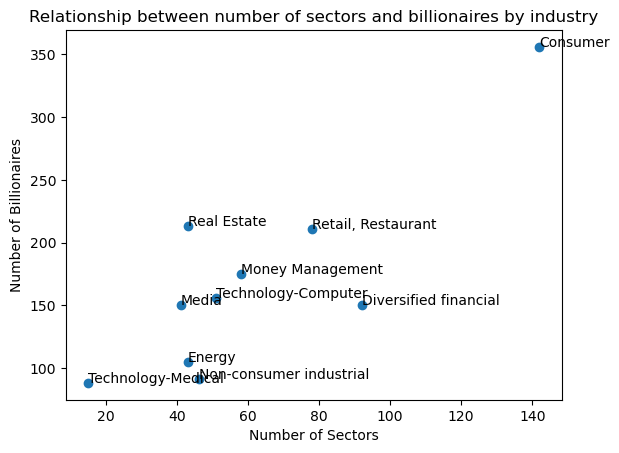

In [97]:
# Data
num_sectors = [142, 43, 78, 58, 51, 41, 92, 43, 46, 15]
num_billionaires = [356, 213, 211, 175, 156, 150, 150, 105, 91, 88]
industry_names = ['Consumer', 'Real Estate ', 'Retail, Restaurant',  'Money Management','Technology-Computer', 'Media', 
                  'Diversified financial', 'Energy', 'Non-consumer industrial', 'Technology-Medical']

# Create scatter plot
fig, ax = plt.subplots()
ax.scatter(num_sectors, num_billionaires)

# Add labels and title
ax.set_xlabel('Number of Sectors')
ax.set_ylabel('Number of Billionaires')
ax.set_title('Relationship between number of sectors and billionaires by industry')

# Add industry names as annotations
for i, txt in enumerate(industry_names):
    ax.annotate(txt, (num_sectors[i], num_billionaires[i]))

plt.show()


### Number of Billionaires per Sector :

In [98]:
# Number of billionaires in each sector :

sector_billionaires_count = df_billionaires['c_sector'].value_counts()

data_sector = {'c_sector': sector_billionaires_count.index,
        'Number_of_Billionaires': sector_billionaires_count.values}
data_sector=pd.DataFrame(data_sector)
top_sectors=data_sector.head(15)
top_sectors

,c_sector,Number_of_Billionaires
0,real estate,135
1,retail,92
2,construction,81
3,media,76
4,banking,71
5,pharmaceuticals,61
6,oil,53
7,hedge funds,45
8,software,44
9,technology,28


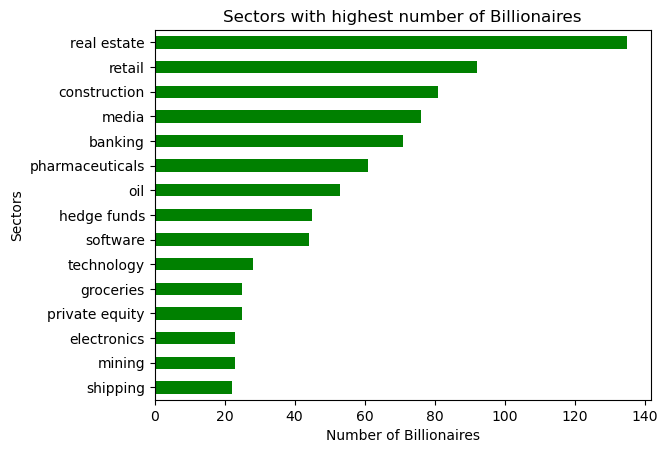

In [99]:
# Create a horizontal bar chart
top_sectors.sort_values('Number_of_Billionaires').set_index('c_sector')['Number_of_Billionaires'].plot(kind='barh', color='green')

# Set the chart title and axis labels
plt.title('Sectors with highest number of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Sectors')

# Display the chart
plt.show()


### Net worth of billionaires per sector:


In [100]:
### Net worth of billionaires in each sector:
# Group the data by sector and calculate the total net worth for each group
sector_net_worth = df_billionaires.groupby('c_sector')['net_worth'].sum()
net_worth ={'c_sector':sector_net_worth.index,'Total_net_worth':sector_net_worth.values}
net_worth=pd.DataFrame(net_worth)
net_worth= net_worth.sort_values(by='Total_net_worth',ascending=False)
top_sector_net_worth=net_worth.head(15)
top_sector_net_worth

,c_sector,Total_net_worth
381,real estate,423
392,retail,366
291,media,301
442,technology,301
56,banking,171
117,construction,153
421,software,152
224,hedge funds,150
211,groceries,148
325,oil,146


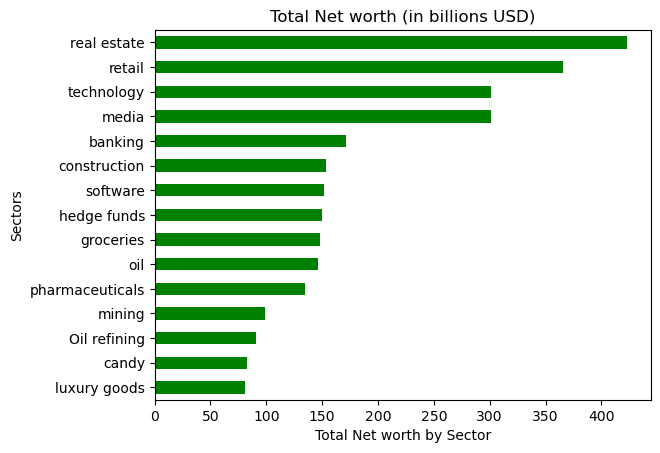

In [101]:
# Create a horizontal bar chart
top_sector_net_worth.sort_values('Total_net_worth').set_index('c_sector')['Total_net_worth'].plot(kind='barh', color='green')
# Set the chart title and axis labels
plt.title('Total Net worth (in billions USD)')
plt.xlabel('Total Net worth by Sector')
plt.ylabel('Sectors')
# Display the chart
plt.show()

### Gathering all data about Sectors to answer our main question :

In [102]:
# group the data by sector and get the count and sum of net worth
sector_group = df_billionaires.groupby('c_sector')
sector_count = sector_group['name'].count()#.head(10)
sector_net_worth_sum = sector_group['net_worth'].sum()

# create a new DataFrame with the required columns
sector_data = pd.DataFrame({'total_net_worth': sector_net_worth_sum,'number_of_billionaires': sector_count})

# sort the DataFrame by the total net-worth in descending order
sector_data = sector_data.sort_values(by='total_net_worth', ascending=False).head(15)

# print the result
sector_data#.head(15)

,total_net_worth,number_of_billionaires
c_sector,,
real estate,423,135
retail,366,92
media,301,76
technology,301,28
banking,171,71
construction,153,81
software,152,44
hedge funds,150,45
groceries,148,25


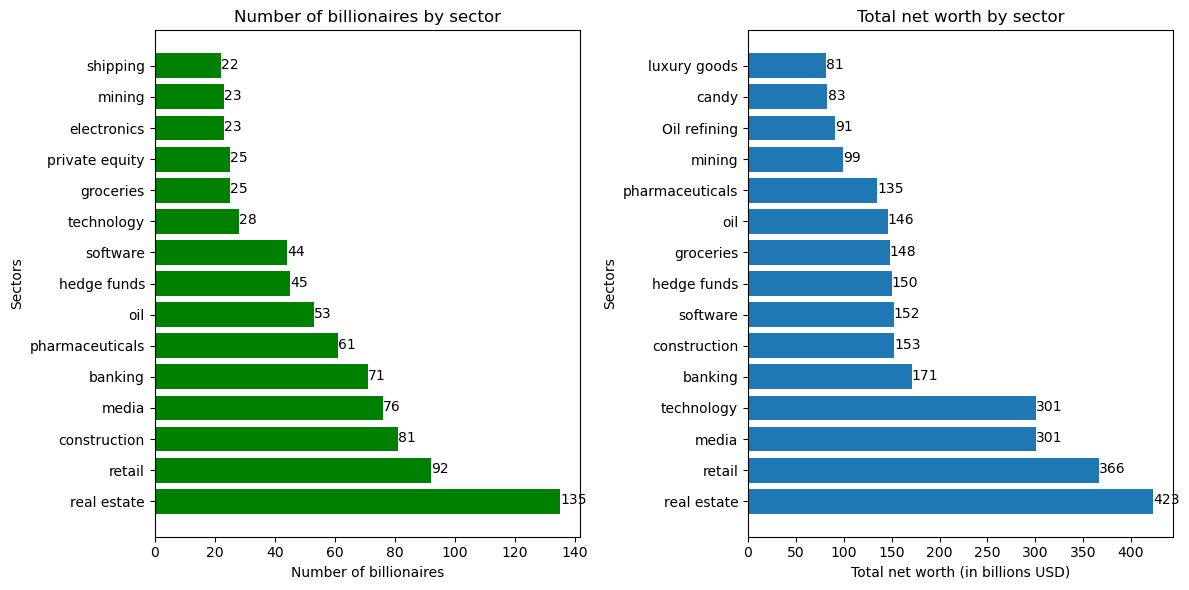

In [103]:
# sort the sectors by number of billionaires and total net worth
sorted_by_count = df_billionaires.groupby('c_sector')['name'].count().sort_values(ascending=False)
sorted_by_net_worth = df_billionaires.groupby('c_sector')['net_worth'].sum().sort_values(ascending=False)

# get the top 15 sectors by number of billionaires and total net worth
top_15_count = sorted_by_count[:15]
top_15_net_worth = sorted_by_net_worth[:15]

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# create a horizontal bar chart for the number of billionaires
axs[0].barh(top_15_count.index, top_15_count.values, color='green')
axs[0].set_xlabel('Number of billionaires')
axs[0].set_ylabel('Sectors')
axs[0].set_title('Number of billionaires by sector')

# Add the value labels to each bar
for i, v in enumerate(top_15_count.values):
    axs[0].text(v + 0.1, i - 0.1, str(v))

# create a horizontal bar chart for the total net worth
axs[1].barh(top_15_net_worth.index, top_15_net_worth.values)
axs[1].set_xlabel('Total net worth (in billions USD)')
axs[1].set_ylabel('Sectors')
axs[1].set_title('Total net worth by sector')

# Add the value labels to each bar
for i, v in enumerate(top_15_net_worth.values):
    axs[1].text(v + 0.1, i - 0.1, str(v))

# adjust the layout and display the plot
fig.tight_layout()
plt.show()


### Adding percentages to the above data to get the percentage of Net worth for Billionaire per Sector :

In [104]:
# calculate the percentage of billionaires,and net worth for each sector to get the percentage of net worth per billionaire
sector_data['percentage_of_billionaires'] = round(sector_data['number_of_billionaires'] / sector_data['number_of_billionaires'].sum() * 100, 2).apply(lambda x: str(x) + '%')
sector_data['percentage_of_net_worth'] = round(sector_data['total_net_worth'] / sector_data['total_net_worth'].sum() * 100, 2).apply(lambda x: str(x) + '%')
sector_data['percentage_net_worth_per_bill']= round(sector_data['total_net_worth'] / sector_data['number_of_billionaires'] , 2).apply(lambda x: str(x) + '%')

In [105]:
sector_data_2=sector_data[['total_net_worth','percentage_of_net_worth','number_of_billionaires','percentage_of_billionaires','percentage_net_worth_per_bill']]

In [106]:
sector_data_2.head(15)

,total_net_worth,percentage_of_net_worth,number_of_billionaires,percentage_of_billionaires,percentage_net_worth_per_bill
c_sector,,,,,
real estate,423,15.11%,135,17.86%,3.13%
retail,366,13.07%,92,12.17%,3.98%
media,301,10.75%,76,10.05%,3.96%
technology,301,10.75%,28,3.7%,10.75%
banking,171,6.11%,71,9.39%,2.41%
construction,153,5.46%,81,10.71%,1.89%
software,152,5.43%,44,5.82%,3.45%
hedge funds,150,5.36%,45,5.95%,3.33%
groceries,148,5.29%,25,3.31%,5.92%


### Highest 15 Sectors Average Net Worth per Billionaire

In [107]:
# create a copy of the column
sector_percentages = sector_data_2['percentage_net_worth_per_bill'].copy()

# remove the '%' symbol and convert to float
sector_percentages = sector_percentages.str.replace('%', '').astype(float)

# print the converted values
sector_percentages.sort_values(ascending= False)

c_sector
Oil refining       22.75
technology         10.75
candy              10.38
luxury goods        8.10
groceries           5.92
mining              4.30
retail              3.98
media               3.96
software            3.45
hedge funds         3.33
real estate         3.13
oil                 2.75
banking             2.41
pharmaceuticals     2.21
construction        1.89
Name: percentage_net_worth_per_bill, dtype: float64

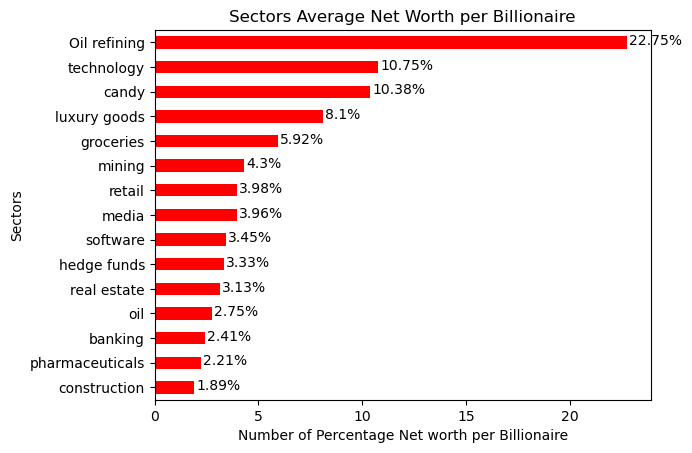

In [108]:
ax = sector_percentages.sort_values(ascending=True).plot(kind='barh', color='red')
# Set the chart title and axis labels
plt.title('Sectors Average Net Worth per Billionaire')
plt.xlabel('Number of Percentage Net worth per Billionaire')
plt.ylabel('Sectors')

# Add the value labels to each bar
for i, v in enumerate(sector_percentages.sort_values(ascending=True)):
    ax.text(v + 0.1, i - 0.1, str(v) + '%')

# Display the chart
plt.show()


## 3) What are the main industries with the highest number of Women Billionaires ?


In [109]:
gender_count=df_billionaires['gender'].value_counts()
gender_count

male      1787
female     206
Name: gender, dtype: int64

In [110]:
# First we have to filter the data that include only women billionaires
df_women = df_billionaires[df_billionaires['gender'] == 'female']

# Count the number of women billionaires in each industry
df_women_per_industry = df_women['industry'].value_counts().nlargest(10)

df_women_per_industry

Consumer                   51
Retail, Restaurant         27
Real Estate                22
Money Management           16
Media                      15
Constrution                14
Non-consumer industrial    13
Diversified financial      12
Technology-Computer        10
Mining and metals           9
Name: industry, dtype: int64

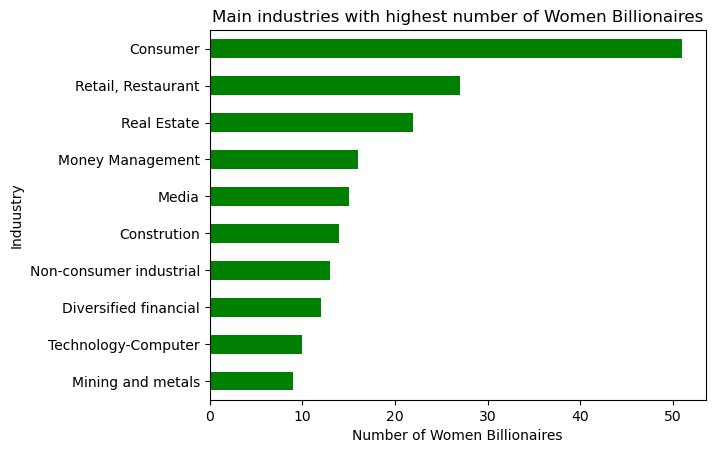

In [111]:
# Create a horizontal bar chart
df_women_per_industry.sort_values(ascending=True).plot(kind='barh', color = 'green')
# Set the chart title and axis labels
plt.title('Main industries with highest number of Women Billionaires')
plt.xlabel('Number of Women Billionaires')
plt.ylabel('Induustry')
plt.show()

## 4)What age range represents the highest and lowest number of billionaires?


In [222]:
# Split the age column into 20-year ranges
df_billionaires['age_range'] = pd.cut(df_billionaires['age'], bins=range(0, 101, 20), right=False, labels=range(0, 100, 20))
# Calculate the count of billionaires in each age range
age_range_counts = df_billionaires['age_range'].value_counts().sort_index()
# Define the age ranges in years
age_ranges_years = [f'{start}-{start+19}' for start in range(0, 101, 20)]
# Define the colors for each age range
age_range_colors = ['purple', 'red', 'blue', 'orange', 'green', 'black']
# Find the age range with the highest count
highest_count_age_range = age_range_counts.idxmax()
highest_count_start_year = int(highest_count_age_range)
highest_count_end_year = highest_count_start_year + 19
# Find the age range with the lowest count
lowest_count_age_range = age_range_counts.idxmin()
lowest_count_start_year = int(lowest_count_age_range)
lowest_count_end_year = lowest_count_start_year + 19

print("Age range with the highest number of billionaires:", highest_count_age_range)
print("Range from:", highest_count_start_year, "to", highest_count_end_year)
print("Age range with the lowest number of billionaires:", lowest_count_age_range)
print("Range from:", lowest_count_start_year, "to", lowest_count_end_year)

Age range with the highest number of billionaires: 60
Range from: 60 to 79
Age range with the lowest number of billionaires: 0
Range from: 0 to 19


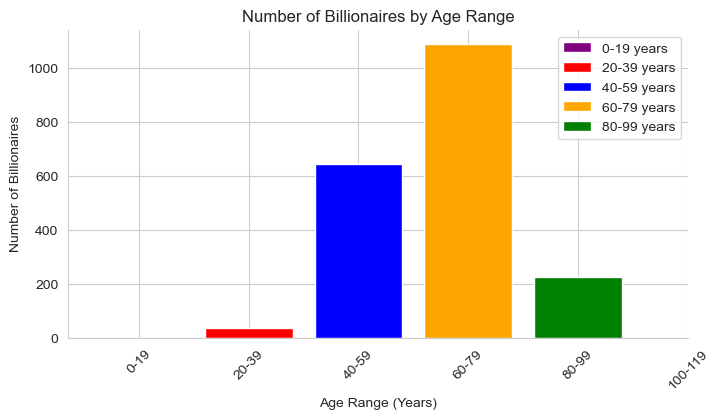

In [221]:
# Create a bar chart with different colors for each age range
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(range(len(age_range_counts)), age_range_counts, color=age_range_colors)
ax.set_title('Number of Billionaires by Age Range')
ax.set_xlabel('Age Range (Years)')
ax.set_ylabel('Number of Billionaires')
ax.set_xticks(range(len(age_ranges_years)))
ax.set_xticklabels(age_ranges_years, rotation=45)
# Add a legend for the color palette
legend_labels = [f'{age_range} years' for age_range in age_ranges_years]
plt.legend(bars, legend_labels)
# Set the background color to transparent
ax.patch.set_alpha(0.0)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

##  What are the factors that might influence wealth, e.g. inheritance?

In [114]:
df_billionaires.head(10)

,name,age,gender,country,region,net_worth,inheritance,industry,c_sector
2,Bill Gates,58,male,United States,North America,76,Not Inherited,Technology-Computer,Software
5,Carlos Slim Helu,74,male,Mexico,Latin America,72,Not Inherited,Media,Communications
8,Amancio Ortega,77,male,Spain,Europe,64,Not Inherited,"Retail, Restaurant",Fashion
11,Warren Buffett,83,male,United States,North America,58,Not Inherited,Consumer,Finance
13,Theo and Karl Albrecht,61,male,Germany,Europe,25,Not Inherited,"Retail, Restaurant",groceries
14,Larry Ellison,69,male,United States,North America,48,Not Inherited,Technology-Computer,software
17,Charles Koch,78,male,United States,North America,40,Inherited,Diversified financial,Oil refining
18,David Koch,73,male,United States,North America,40,Inherited,Diversified financial,Oil refining
22,John Walton,55,male,United States,North America,18,Inherited,Consumer,retail
23,Sheldon Adelson,80,male,United States,North America,38,Not Inherited,Real Estate,casinos


### Exploration & Visualization for the Data we are going to use in our analysis to answer the previous question 

### Distribution of  Categorical Variables according to the total Net worth of Billionaires

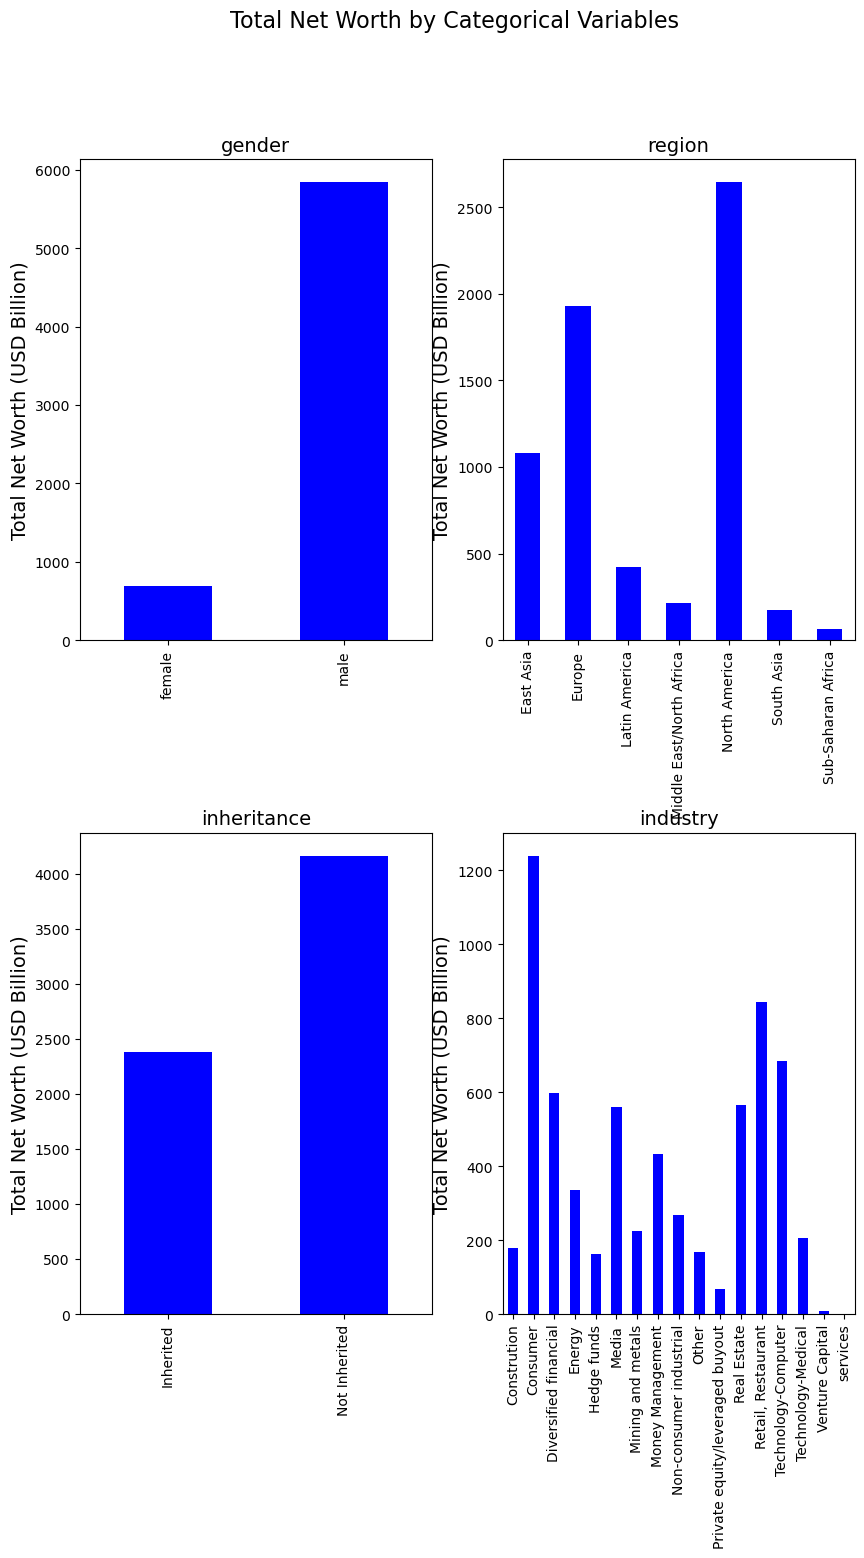

In [115]:
# Bar charts for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=[ 'gender', 'region','inheritance','industry']

import matplotlib.pyplot as plt_2
fig, PlotCanvas=plt_2.subplots(nrows=2, ncols=2, figsize=(10,15))

# Creating bar charts for each continuous predictor against the Target Variable "Price"
for Col , ax in zip(CategoricalColsList, PlotCanvas.flatten()):
    counts = df_billionaires.groupby(Col)['net_worth'].sum().reset_index()
    counts.plot(x=Col, y='net_worth', kind='bar', ax=ax, color='blue', legend=False, rot=90)
    ax.set_title(Col, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Total Net Worth (USD Billion)', fontsize=14)
    ax.tick_params(axis='both', labelsize=10)
    #ax.set_ylim(0, 1000)

# Set the main title for the figure
plt_2.suptitle('Total Net Worth by Categorical Variables', fontsize=16)

# Adjust spacing between subplots
plt_2.subplots_adjust(wspace=0.2, hspace=0.4)

# Display the plot
plt_2.show()


### Net worth variable & the categorical variables distribution and analysis according to number of Billionaires

In [116]:
# Calculate the top 10 net worth values and their counts
counts = df_billionaires['net_worth'].value_counts().head(10).reset_index()

# Rename the columns to their appropriate titles
counts.columns = ['Net worth in billions', 'Number of billionaires']

# Set the index to be the net worth values
counts = counts.set_index('Net worth in billions')

# Display the counts with titles
print(counts.to_string())


                       Number of billionaires
Net worth in billions                        
1                                         926
2                                         422
3                                         218
4                                         108
5                                          66
6                                          45
7                                          30
8                                          23
10                                         21
9                                          19


In [117]:
# create empty lists to store the resulting dataframes and column names
dfs = []
cols = ['gender', 'region', 'inheritance', 'industry']
# iterate over the columns of interest and get the value counts as separate dataframes
for col in ['gender', 'region', 'inheritance', 'industry']:
    counts = df_billionaires[col].value_counts()
    col_df = pd.DataFrame({'Count': counts})
    dfs.append(col_df)

# concatenate the resulting dataframes next to each other
result = pd.concat(dfs, axis=1, keys=cols)

# display the resulting dataframe with a line between each result and the total count
for col in cols:
    col_data = result[col].dropna()
    print(f"{col}:")
    print(col_data)
    print("--------------------")
    print(f"Total: {col_data.sum()}")
    print("\n")


gender:
         Count
male    1787.0
female   206.0
--------------------
Total: Count    1993.0
dtype: float64


region:
                          Count
North America             718.0
Europe                    542.0
East Asia                 422.0
Latin America             136.0
Middle East/North Africa   95.0
South Asia                 63.0
Sub-Saharan Africa         17.0
--------------------
Total: Count    1993.0
dtype: float64


inheritance:
                Count
Not Inherited  1338.0
Inherited       655.0
--------------------
Total: Count    1993.0
dtype: float64


industry:
                                 Count
Consumer                         356.0
Real Estate                      213.0
Retail, Restaurant               211.0
Money Management                 175.0
Technology-Computer              156.0
Diversified financial            150.0
Media                            150.0
Energy                           105.0
Non-consumer industrial           91.0
Technology-Medical   

In [118]:
def PlotBarCharts(inpData, colsToPlot, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(20,5))
    inpData.groupby(colsToPlot).size().plot(kind='bar', ax=ax)


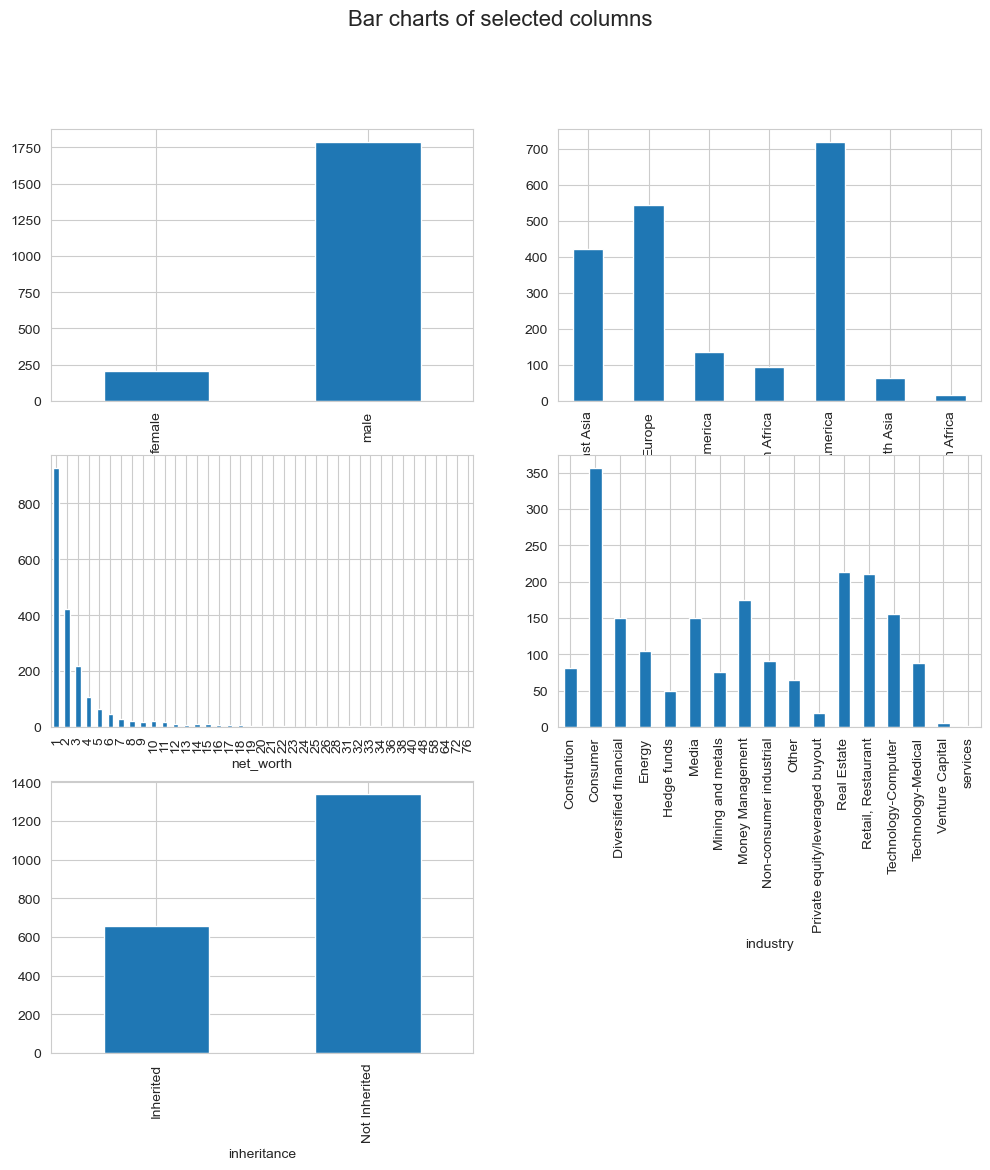

In [225]:
# Creating a grid of plots with 3 rows and 2 columns, and a larger figure size
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plotting the bar charts on the grid
PlotBarCharts(df_billionaires, ['gender'], ax=axs[0,0])
PlotBarCharts(df_billionaires, ['region'], ax=axs[0,1])
PlotBarCharts(df_billionaires, ['net_worth'], ax=axs[1,0])
PlotBarCharts(df_billionaires, ['industry'], ax=axs[1,1])
PlotBarCharts(df_billionaires, ['inheritance'], ax=axs[2,0])

# Removing the empty subplot
fig.delaxes(axs[2,1])

# Adding a main title to the figure
fig.suptitle('Bar charts of selected columns', fontsize=16)

# Displaying the figure
plt.show()


## Age influence on Net worth 

### Figure to show the distribution of Age 

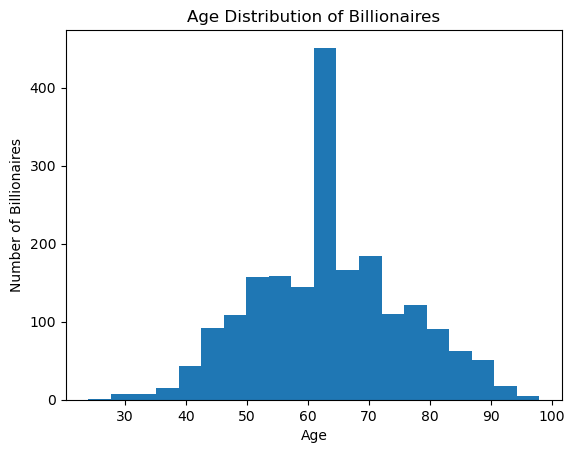

In [120]:
# The Age Distribution of Billionaires :

plt.hist(df_billionaires['age'], bins=20)

# Set the chart title and axis labels
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Number of Billionaires')

# Display the chart
plt.show()

### Age VS Net Worth Correlation & Hypothesis 

In [121]:
# Extract the age and net worth columns from the DataFrame
age = df_billionaires['age']
net_worth = df_billionaires['net_worth']

# Perform Pearson correlation test
corr_coef, p_value = stats.pearsonr(age, net_worth)

# Print the results
print(f"Correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Correlation coefficient: 0.095
P-value: 0.000


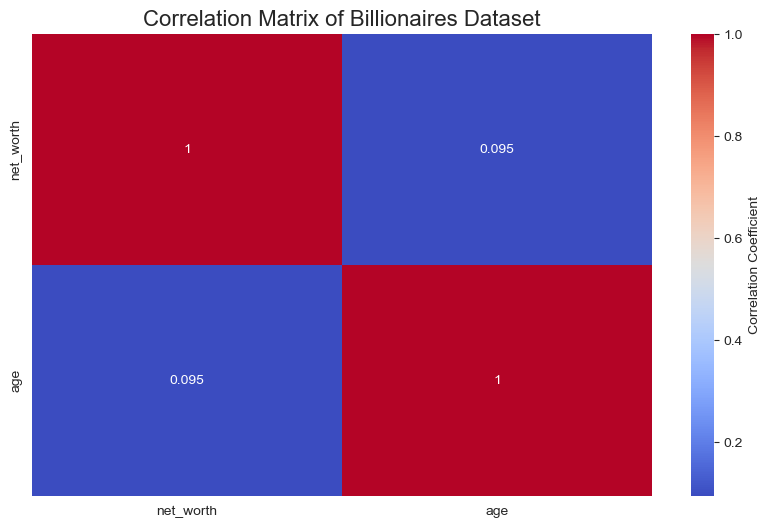

In [226]:
age_to_net_worth_correlation_fig=df_billionaires[[ 'net_worth', 'age']]
cormat_2 = age_to_net_worth_correlation_fig.corr()
round(cormat_2,2)


plt.figure(figsize=(10,6))

sns.heatmap(cormat_2, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Billionaires Dataset', fontsize=16)
plt.show()

In [123]:
# Select the columns of interest
age = df_billionaires['age']
net_worth = df_billionaires['net_worth']

# Perform a Pearson correlation test
corr_coef, p_value = stats.pearsonr(age, net_worth)

# Define the significance level
alpha = 0.05

# Print the results
print("Hypothesis Test Results")
print("-----------------------")
print("Null Hypothesis: There is no significant correlation between age and net worth")
print("Alternative Hypothesis: There is a significant correlation between age and net worth")
print(f"Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print(f"Result: Reject the null hypothesis. There is a significant correlation between age and net worth at a significance level of   {alpha}.")
else:
    print(f"Result: Accept the null hypothesis. There is no significant correlation between age and net worth at a significance level of  {alpha}.")



Hypothesis Test Results
-----------------------
Null Hypothesis: There is no significant correlation between age and net worth
Alternative Hypothesis: There is a significant correlation between age and net worth
Correlation Coefficient: 0.095
P-value: 0.000
Result: Reject the null hypothesis. There is a significant correlation between age and net worth at a significance level of   0.05.


### Based on the correlation matrix, there is a positive but weak correlation between age and net worth among billionaires. The Pearson correlation coefficient between the two variables is 0.095, which indicates a weak positive correlation. This means that as age increases, net worth also tends to increase, but the strength of this relationship is weak. The p-value obtained is 0.000, which is less than the significance level of 0.05. Therefore, we can conclude that the correlation between age and net worth is statistically significant.

### The hypothesis test results provide further evidence that there is a significant relationship between age and net worth among billionaires. The null hypothesis, which states that there is no significant relationship between age and net worth, is rejected based on the obtained p-value of less than 0.05. Therefore, we can conclude that there is a significant relationship between age and net worth among billionaires.

### In conclusion, both the correlation matrix and hypothesis test results suggest that age and net worth are related among billionaires. However, the correlation is weak, indicating that other factors may play a more significant role in determining net worth. It is also essential to note that correlation does not imply causation, and further analysis is necessary to determine the causal relationship between age and net worth. Nonetheless, the findings of this study provide valuable insights into the factors influencing the wealth of billionaires.


## Inheritance influence on Net worth

In [124]:
# Number of inherited VS not inherited Billionaires

inheritance_to_net_worth=df_billionaires['inheritance'].value_counts()
inheritance_to_net_worth

Not Inherited    1338
Inherited         655
Name: inheritance, dtype: int64

### Chart to show Inheritance status

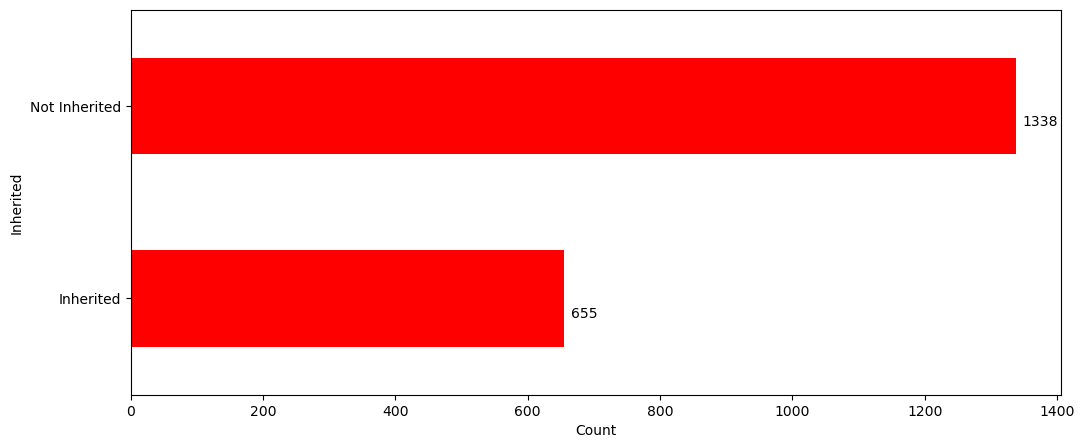

In [125]:
# Get value counts of inherited status
inheritance_to_net_worth = df_billionaires['inheritance'].value_counts().sort_values(ascending=True)

# Create bar chart of inherited status
fig, ax = plt.subplots(figsize=(12,5 ))
inheritance_to_net_worth.plot(kind='barh', color='red', ax=ax)
# Add count labels to bars
for i, v in enumerate(inheritance_to_net_worth):
    ax.text(v + 10, i - 0.1, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('Inherited')
plt.show()

### -The chart shows the number of billionaires who inherited their wealth versus who did not.
### - As a result, the majority of billionaires inherited their wealth, this may be due to wealth concentration in particular families and the intergenerational transfer of wealth.

## Inheritance Hypothesis Test 

In [126]:
# define two groups based on the hypothesis
# Split the dataset into two groups: inherited and non-inherited
inherited = df_billionaires[df_billionaires['inheritance'] == 'Inherited']['net_worth']
not_inherited = df_billionaires[df_billionaires['inheritance'] == 'Not Inherited']['net_worth']
# Calculate mean, standard deviation, and sample size for each group
mean_inherited = np.mean(inherited)
std_inherited = np.std(inherited, ddof=1)
n_inherited = len(inherited)
mean_not_inherited = np.mean(not_inherited)
std_not_inherited = np.std(not_inherited, ddof=1)
n_not_inherited = len(not_inherited)
median_inherited = inherited.median()
median_not_inherited = not_inherited.median()
print('-' * 110)
# Print the relevant statistics
print('Inherited wealth: mean= {:.2f} billion USD, median= {:.2f} billion USD, n= {} billionaires'.format(mean_inherited, median_inherited, n_inherited))

print('Non-inherited wealth: mean= {:.2f} billion USD, median= {:.2f} billion USD, n= {} billionaires'.format(mean_not_inherited, median_not_inherited, n_not_inherited))
print('-' * 110)
print('-' * 110)

# conduct a two-sample t-test
t, p = ttest_ind(inherited, not_inherited, equal_var=False)

# print the results
print("\nInheritance hypothesis test:")
print("Null hypothesis: Inheritance has no effect on wealth")
print("Alternative hypothesis: Inheritance has an effect on wealth")
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

--------------------------------------------------------------------------------------------------------------
Inherited wealth: mean= 3.63 billion USD, median= 2.00 billion USD, n= 655 billionaires
Non-inherited wealth: mean= 3.11 billion USD, median= 1.00 billion USD, n= 1338 billionaires
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

Inheritance hypothesis test:
Null hypothesis: Inheritance has no effect on wealth
Alternative hypothesis: Inheritance has an effect on wealth
p-value: 0.037097925112986055
Reject the null hypothesis


## Inheritance hypothesis test:
### ------------------------------------------------


### -Null hypothesis: Inheritance has no effect on wealth
### -Alternative hypothesis: Inheritance has an effect on wealth

### -p-value: 0.028957092120141643

## *Reject the null hypothesis, Inheritance has an effect on wealth


### Based on the results, it appears that there is a statistically significant difference in net wealth between billionaires with inherited wealth and those without. The mean net worth of billionaires with inherited wealth is 3.63 billion USD, which is higher than the mean net worth of billionaires without inherited wealth, which is 3.11 billion USD. Similarly, the median net worth of billionaires with inherited wealth is 2.00 billion USD, which is higher than the median net worth of billionaires without inherited wealth, which is 1.00 billion USD.

### The hypothesis test results suggest that there is a significant effect of inheritance on wealth, as evidenced by a p-value of 0.037, which is less than the conventional threshold of 0.05. This means that we can reject the null hypothesis that inheritance has no effect on wealth, and conclude that there is evidence to support the alternative hypothesis that inheritance does have an effect on wealth.

### Overall, these results suggest that inheritance can have a significant impact on net wealth, with billionaires who inherit wealth tending to have higher net worths than those who do not inherit. However, it is important to note that correlation does not necessarily imply causation, and there may be other factors that influence net wealth besides inheritance. Additionally, this analysis only considers net worth and does not take into account other measures of success or well-being, such as happiness, health, or social connections.







## Gender influence on Net worth

In [127]:
# Calculate number of billionaires for each gender

gender_to_net_worth = df_billionaires['gender'].value_counts()

# Get the count for each gender
male_count = gender_to_net_worth['male']
female_count = gender_to_net_worth['female']

# Print the result
print("Number of Male Billionaires: {} Billionaires".format(male_count))
print("Number of Female Billionaires: {} Billionaires".format(female_count))


Number of Male Billionaires: 1787 Billionaires
Number of Female Billionaires: 206 Billionaires


### Chart to show Number of Billionaires per Gender

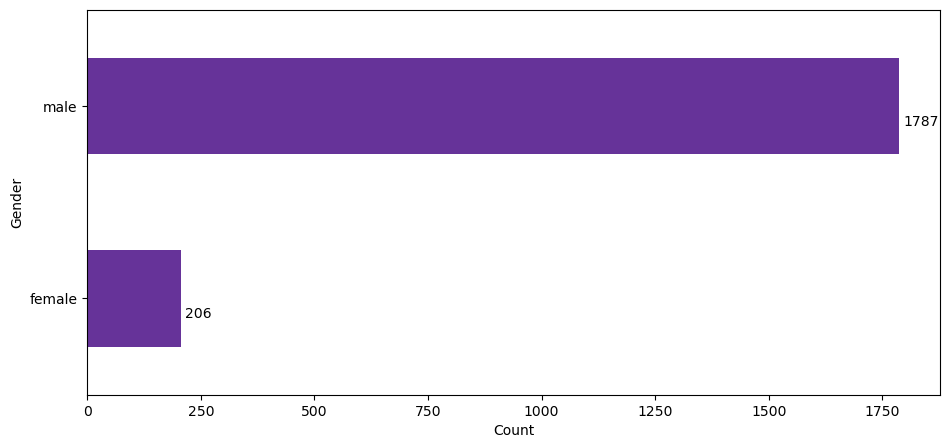

In [128]:
# Get value counts of gender status
gender_to_net_worth = df_billionaires['gender'].value_counts().sort_values(ascending=True)

# Create bar chart of gender status
fig, ax = plt.subplots(figsize=(11,5 ))
gender_to_net_worth.plot(kind='barh', color='rebeccapurple', ax=ax)
# Add count labels to bars
for i, v in enumerate(gender_to_net_worth):
    ax.text(v + 10, i - 0.1, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

## Gender Hypothesis Test 

In [129]:
# define two groups based on the hypothesis
male = df_billionaires[df_billionaires['gender'] == 'male']['net_worth']
female = df_billionaires[df_billionaires['gender'] == 'female']['net_worth']

# Calculate mean, standard deviation, and sample size for each group
mean_inherited = np.mean(male)
std_inherited = np.std(male, ddof=1)
n_inherited = len(male)
mean_not_inherited = np.mean(female)
std_not_inherited = np.std(female, ddof=1)
n_not_inherited = len(female)

# conduct a two-sample t-test
t, p = ttest_ind(male, female, equal_var=False)

# print the results
print("Gender hypothesis test:")
print("Null hypothesis: Gender has no effect on wealth")
print("Alternative hypothesis: Gender has an effect on wealth")
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


Gender hypothesis test:
Null hypothesis: Gender has no effect on wealth
Alternative hypothesis: Gender has an effect on wealth
p-value: 0.7746049966451457
Accept the null hypothesis


## Gender hypothesis test:
### -----------------------------------------


### -Null hypothesis: Gender has no effect on wealth
### -Alternative hypothesis: Gender has an effect on wealth

### -p-value: 0.7961380043402271

## -Accept the null hypothesis, Gender has no effect on wealth

## Region influence on Net worth


### chart to show the percentage of Net worth distribution 

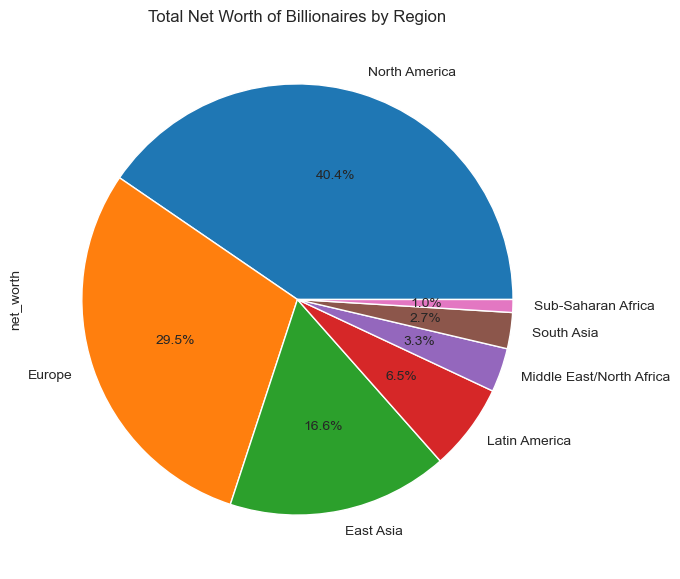

In [227]:
df_billionaires.groupby('region')['net_worth'].sum().sort_values(ascending = False).plot(kind = 'pie', autopct='%1.1f%%',figsize=(8,7),title= 'Total Net Worth of Billionaires by Region');

### chart to show the total value of Net worth per Region

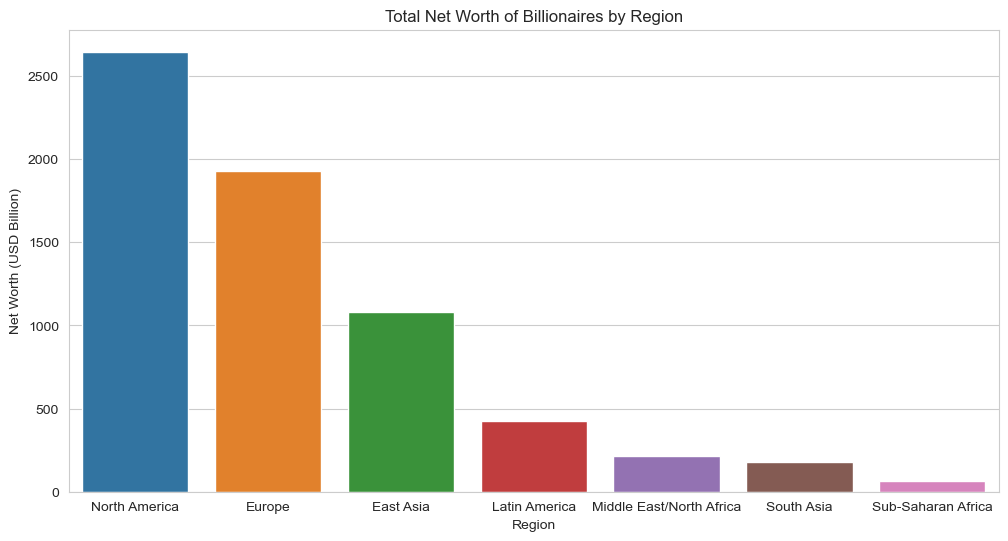

In [131]:
# create a dataframe of the sum of net worth by region
region_sum_df = df_billionaires.groupby('region')['net_worth'].sum().reset_index()

# create the bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='net_worth', data=region_sum_df, order=region_sum_df.sort_values('net_worth', ascending=False)['region'])

# add title and axis labels
plt.title('Total Net Worth of Billionaires by Region')
plt.xlabel('Region')
plt.ylabel('Net Worth (USD Billion)')



# show the plot
plt.show()

In [132]:
# ANOVA test for region variable
region_groups = df_billionaires.groupby("region")["net_worth"].apply(list)
f_statistic, p_value = stats.f_oneway(*region_groups)
print("Region ANOVA Test p-value:", p_value)
print('-' * 40)


print("Null hypothesis: Region has no effect on wealth")
print("Alternative hypothesis: Region has an effect on wealth")
print('-' * 40)


if p_value < alpha:
    print("Null hypothesis rejected. Region has an effect on wealth.")
else:
    print("Null hypothesis accepted. Region has no effect on wealth.")

Region ANOVA Test p-value: 0.009293865004029457
----------------------------------------
Null hypothesis: Region has no effect on wealth
Alternative hypothesis: Region has an effect on wealth
----------------------------------------
Null hypothesis rejected. Region has an effect on wealth.


## Region hypothesis test:
### -----------------------------------------
### -Null hypothesis: Region has no effect on wealth
### -Alternative hypothesis: Region has an effect on wealth

### -Region ANOVA Test p-value: 0.008087482161961817


## -Null hypothesis rejected. Region has an effect on wealth.


## Industry influence on Net worth


In [133]:
# Perform ANOVA test for industry variable
industry_groups = df_billionaires.groupby("industry")["net_worth"].apply(list)
f_statistic, p_value = stats.f_oneway(*industry_groups)
print("Industry ANOVA Test p-value:", p_value)
print('-' * 40)

print("Null hypothesis: Industry has no effect on wealth")
print("Alternative hypothesis: Industry has an effect on wealth")
print('-' * 40)


if p_value < alpha:
    print("Null hypothesis rejected. Industry has an effect on wealth.")
else:
    print("Null hypothesis accepted. Industry has no effect on wealth.")

print('-' * 40)
print('-' * 40)

Industry ANOVA Test p-value: 0.017524615715142973
----------------------------------------
Null hypothesis: Industry has no effect on wealth
Alternative hypothesis: Industry has an effect on wealth
----------------------------------------
Null hypothesis rejected. Industry has an effect on wealth.
----------------------------------------
----------------------------------------


## Industry hypothesis test:
### --------------------------------------------
### -Null hypothesis: Industry has no effect on wealth
### -Alternative hypothesis: Industry has an effect on wealth

### -Industry ANOVA Test p-value: 0.01453766799037527


## -Null hypothesis rejected. Industry has an effect on wealth.
